In [3]:
# Import all dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of rendom latitudes and longitude combinations.

lats = np.random.uniform(low= -90.000, high= 90.000, size = 1600)

lngs = np.random.uniform(low = -180.000, high = 180.00, size = 1600)

lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-23.142291426028862 135.79778373750185
74.18236443552723 -120.36147142124315
-64.3359907533654 -18.19824183715386
-43.15118794854492 49.51642407731987
16.71081945516562 -129.53182288133738
-24.751992093812945 68.23397277410928
-70.15236100767095 -53.60634476115841
14.01518366158139 -12.237722079017402
-85.00178060875095 128.24427896856292
-19.173576105426335 152.15359543127278
82.57231714301071 -167.33952912427267
-74.16652361709882 -163.97837893212983
-56.80064185737939 -100.42706423270536
26.574918582284624 -68.61549099427639
19.545710254568206 -98.43648518736228
-49.31402692308898 -157.50894972466705
-80.2060902511054 -59.27804688218539
44.93266018642231 -5.583844706559773
40.744993003367654 107.9106763183915
-24.64133796043302 -69.764053689419
1.315961688492436 -84.96429937594297
-41.5752378105873 150.83565227693703
-11.208773784998002 -33.607143234665955
85.98061774290352 18.112881966662684
-10.346150962524476 24.060997023454348
85.82349965564808 62.590140004770376
-58.45612004227

26.578575114389565 44.29046296910539
70.01944886767834 -94.64325621065574
-84.02673516340364 172.37480829674354
61.89383377171686 -156.47002597474687
-4.005704339638498 -60.24211033533109
-83.72613704237149 -10.526468548784152
-10.352934087074459 -129.2559049912939
-87.58126627500468 114.83350462977057
20.904672117002434 -29.954500707108963
68.52530939544695 135.648530780619
73.81999525194684 7.3739543630739774
15.181126262489911 37.34513262058661
4.726533467505362 -112.18988725854699
-6.454317766162745 88.80039219294378
68.567079538857 160.42640112300637
-61.137187931258055 -45.279118868986274
-52.50560599755114 -150.9333017868835
-11.4749157202548 138.12614933941023
-84.30344145178691 176.33055943092137
-48.37808167242613 -132.35427649333752
9.646460095501496 -25.330656743336505
-58.44023605548787 -34.620737795161546
-86.3622102449427 -51.0095733206191
-89.79061904103082 -168.54674483374222
-55.62030462860789 37.3550467390362
21.442643558990184 -77.98923996493481
51.34825413051669 -1

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combo.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [10]:
# Import the time library and the datetime module from the datetime library 
import time 
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alice springs
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | guerrero negro
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bakel
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | mackay
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | cockburn town
Processing Record 15 of Set 1 | sanctorum
Processing Record 16 of Set 1 | gijon
Processing Record 17 of Set 1 | haibowan
City not found. Skipping...
Processing Record 18 of Set 1 | taltal
Processing Record 19 of Set 1 | manta
Processing Record 20 of Set 1 | launceston
Processing Record 21 of Set 1 | maceio
Processing Record

Processing Record 36 of Set 4 | ballina
Processing Record 37 of Set 4 | itainopolis
Processing Record 38 of Set 4 | teknaf
Processing Record 39 of Set 4 | kanniyakumari
Processing Record 40 of Set 4 | beloha
Processing Record 41 of Set 4 | mahebourg
Processing Record 42 of Set 4 | teya
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | zenzeli
Processing Record 45 of Set 4 | apatity
Processing Record 46 of Set 4 | barinas
Processing Record 47 of Set 4 | vila franca do campo
Processing Record 48 of Set 4 | porbandar
Processing Record 49 of Set 4 | huarmey
Processing Record 50 of Set 4 | yate
Processing Record 1 of Set 5 | north platte
Processing Record 2 of Set 5 | dehloran
Processing Record 3 of Set 5 | mar del plata
Processing Record 4 of Set 5 | arvika
Processing Record 5 of Set 5 | kaitangata
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | gua musang
Processing Record 8 of Set 5 | torbay
Processing Record 9 of Set 5 | trinidad
Proces

Processing Record 31 of Set 8 | yulara
Processing Record 32 of Set 8 | buzmeyin
Processing Record 33 of Set 8 | touho
Processing Record 34 of Set 8 | ahipara
Processing Record 35 of Set 8 | pazmand
Processing Record 36 of Set 8 | sobolevo
Processing Record 37 of Set 8 | waddan
Processing Record 38 of Set 8 | mitsamiouli
Processing Record 39 of Set 8 | pringsewu
Processing Record 40 of Set 8 | krasnoselkup
Processing Record 41 of Set 8 | yaan
Processing Record 42 of Set 8 | saint charles
Processing Record 43 of Set 8 | sesimbra
Processing Record 44 of Set 8 | hofn
Processing Record 45 of Set 8 | zaranj
Processing Record 46 of Set 8 | dayong
Processing Record 47 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 48 of Set 8 | kamarion
Processing Record 49 of Set 8 | vestmannaeyjar
Processing Record 50 of Set 8 | general bravo
Processing Record 1 of Set 9 | flinders
Processing Record 2 of Set 9 | anstruther
Processing Record 3 of Set 9 | evensk
Processing Record 4 of Set 9

Processing Record 17 of Set 12 | betong
Processing Record 18 of Set 12 | van
Processing Record 19 of Set 12 | beeville
Processing Record 20 of Set 12 | ulsteinvik
Processing Record 21 of Set 12 | saint-louis
Processing Record 22 of Set 12 | wonthaggi
Processing Record 23 of Set 12 | carutapera
Processing Record 24 of Set 12 | byron bay
Processing Record 25 of Set 12 | nago
Processing Record 26 of Set 12 | ciudad guayana
Processing Record 27 of Set 12 | thinadhoo
Processing Record 28 of Set 12 | aras
Processing Record 29 of Set 12 | klodzko
Processing Record 30 of Set 12 | hervey bay
Processing Record 31 of Set 12 | beyneu
Processing Record 32 of Set 12 | bang saphan
Processing Record 33 of Set 12 | touros
Processing Record 34 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 35 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 36 of Set 12 | jinchang
Processing Record 37 of Set 12 | linchuan
City not found. Skipping...
Processing Record 38 of Set 1

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alice Springs,-23.7000,133.8833,54.95,71,31,1.14,AU,2022-05-14 20:06:51
1,Norman Wells,65.2820,-126.8329,42.69,86,100,9.13,CA,2022-05-14 20:06:51
2,Chuy,-33.6971,-53.4616,62.10,76,83,6.55,UY,2022-05-14 20:06:52
3,Guerrero Negro,27.9769,-114.0611,78.01,39,100,13.27,MX,2022-05-14 20:06:52
4,Bambous Virieux,-20.3428,57.7575,72.21,72,89,11.77,MU,2022-05-14 20:06:53
5,Ushuaia,-54.8000,-68.3000,44.26,70,20,8.05,AR,2022-05-14 20:05:05
6,Bakel,14.9050,-12.4568,101.30,7,30,10.96,SN,2022-05-14 20:06:53
7,New Norfolk,-42.7826,147.0587,57.92,72,88,1.99,AU,2022-05-14 20:06:54
8,Mackay,-21.1500,149.2000,69.67,86,29,4.14,AU,2022-05-14 20:06:54
9,Barrow,71.2906,-156.7887,26.62,80,100,13.80,US,2022-05-14 20:06:55


In [13]:
city_data_reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df =city_data_df[city_data_reorder]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alice Springs,AU,2022-05-14 20:06:51,-23.7000,133.8833,54.95,71,31,1.14
1,Norman Wells,CA,2022-05-14 20:06:51,65.2820,-126.8329,42.69,86,100,9.13
2,Chuy,UY,2022-05-14 20:06:52,-33.6971,-53.4616,62.10,76,83,6.55
3,Guerrero Negro,MX,2022-05-14 20:06:52,27.9769,-114.0611,78.01,39,100,13.27
4,Bambous Virieux,MU,2022-05-14 20:06:53,-20.3428,57.7575,72.21,72,89,11.77
5,Ushuaia,AR,2022-05-14 20:05:05,-54.8000,-68.3000,44.26,70,20,8.05
6,Bakel,SN,2022-05-14 20:06:53,14.9050,-12.4568,101.30,7,30,10.96
7,New Norfolk,AU,2022-05-14 20:06:54,-42.7826,147.0587,57.92,72,88,1.99
8,Mackay,AU,2022-05-14 20:06:54,-21.1500,149.2000,69.67,86,29,4.14
9,Barrow,US,2022-05-14 20:06:55,71.2906,-156.7887,26.62,80,100,13.80


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

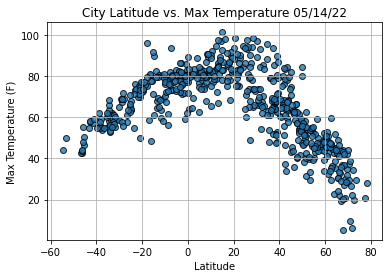

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


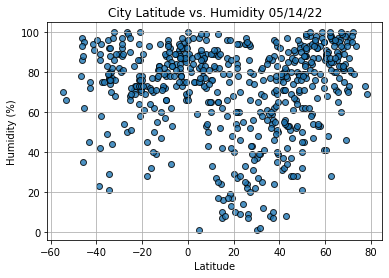

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


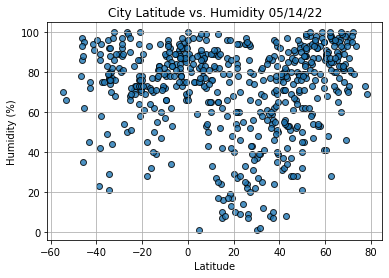

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

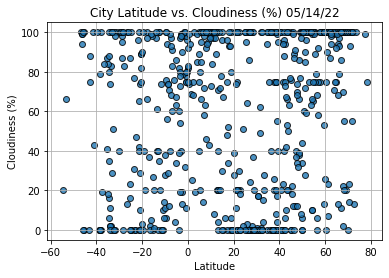

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

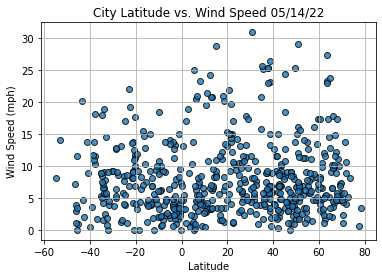

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Create a function to create perform linear regression on the weather data

# and plot a regression line and the equation with the data. 
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title , y_label, text_coordinates):
    
    # RUn regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    
    # Calculate the regression line "y_values" from the slope and intercept
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line 
    
    line_eq = "Y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line 
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation 
    
    plt.annotate(line_eq, text_coordinates, fontsize =15, color = "red")
    
    plt.title (title)
    plt.xlabel ('Latitude')
    plt.ylabel (y_label)
    plt.show ()



    

In [29]:
index13 = city_data_df.loc[13]
index13

City                    Sanctorum
Country                        MX
Date          2022-05-14 20:06:56
Lat                          19.1
Lng                        -98.25
Max Temp                    81.72
Humidity                       17
Cloudiness                      0
Wind Speed                   3.44
Name: 13, dtype: object

In [30]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
574    False
575     True
576     True
577     True
578    False
Name: Lat, Length: 579, dtype: bool

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Norman Wells,CA,2022-05-14 20:06:51,65.2820,-126.8329,42.69,86,100,9.13
3,Guerrero Negro,MX,2022-05-14 20:06:52,27.9769,-114.0611,78.01,39,100,13.27
6,Bakel,SN,2022-05-14 20:06:53,14.9050,-12.4568,101.30,7,30,10.96
9,Barrow,US,2022-05-14 20:06:55,71.2906,-156.7887,26.62,80,100,13.80
12,Cockburn Town,TC,2022-05-14 20:06:56,21.4612,-71.1419,79.25,84,100,19.71


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

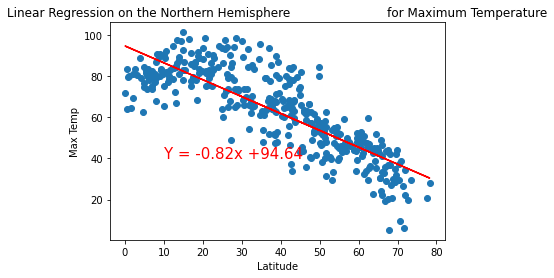

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

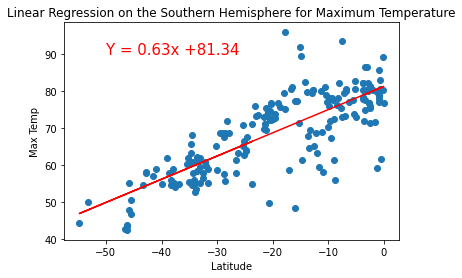

In [42]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature','Max Temp',(-50,90))

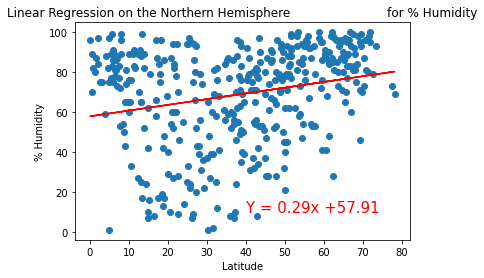

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


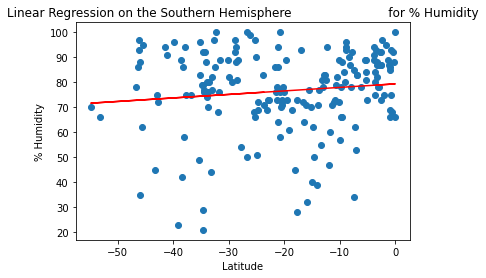

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

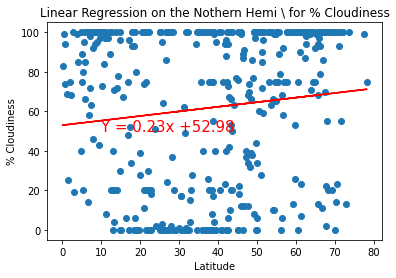

In [55]:
# Linear regression on the Northner Hemi

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# call the function

plot_linear_regression(x_values, y_values, 
                        'Linear Regression on the Nothern Hemi \ for % Cloudiness','% Cloudiness',(10,50))

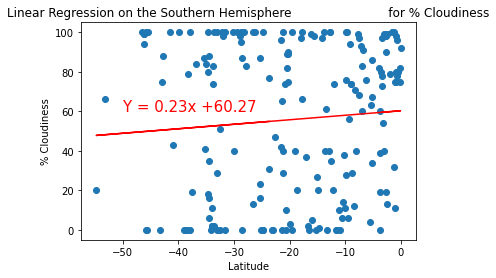

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

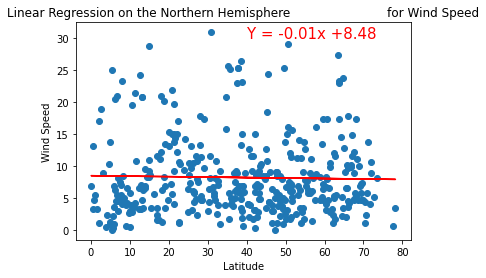

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

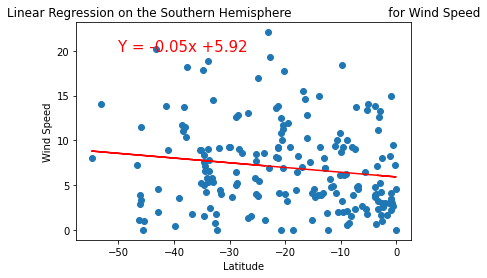

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))